<a href="https://colab.research.google.com/github/BhavyaniD/GIS/blob/main/GIS_PS0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective of the Project

The project aims to successfully create a itenary planner using recommendation engine algorithm and GIS  libraries. The following Plan of Action will be implemented for accomplishing the project.

A. Gather all the necessary data
1. find data of all venues of recreation in NYC
2. Find the parking spaces data
3. find major tourist attraction data
4. find/ create data for venue ratings
5. subway stations data

B. Create the following categories df:
1. must visit for toursit
2. place by age group
3. categorize: dine-in, bar, street-food, shopping, parks, historical, attractions
4. ratings for each place

*Draw a pie chart borough wise
*draw a bar chart of venues
*4star and 5 star rated bar chart category wise

C. Plot the following using GIS Libraries
1. NYC along with its 5 borough - Map 1
2. Plot all the venues - Map 2
3. Now star mark all the best rated venues and must try - Map 3
4. Add to Map3, the parking lots - Map 4

D. Take the following inputs from user
1. Current Location
2. Radius of Exloration
3. tourist or not
4. mode of travel
5. Age
6. Activities
7. Rating required

E. Map the following
1. All places near the current location based on raduis - Map 5
(use different symbols from emoji lbrary to depict different locations
ex: beer glass emoji for bar, etc)

F. Create the model where the inputs from step-D are taken and based on the user preference recommend top 5 places

G. plot the Top 5 places on the map along with the nearby parking spaces of subways - Map 6

H. Based on the mode of travel, give the route to travel from one place to another effectively

I. plot the route on map along with the time required to reach there
Find the distance matrix and recommend the order of travel accordingly
ex: top 5 places are A, B, C ,D, E then D is the closest to current location, and then E is the next nearest and so on. - MAap 7

The website URLs for the data sets used for this project are attached below.

1.

2.

3.


In [ ]:
#pip install necessary libraries
!pip install geopandas==1.0.1
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.7 MB/s eta 0:00:00


In [15]:
#import all necessary libraries

import pandas as pd #data management
import numpy as np #mathematics
import matplotlib.pyplot as plt #viz
import seaborn as sns  #adv viz
import os, zipfile #basics
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()
import geopandas as gpd #gis/maps
import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'New York City and Its Boroughs')

Text(0.5, 23.52222222222222, 'Longitude')

Text(96.39215564756849, 0.5, 'Latitude')

<Figure size 1000x800 with 0 Axes>

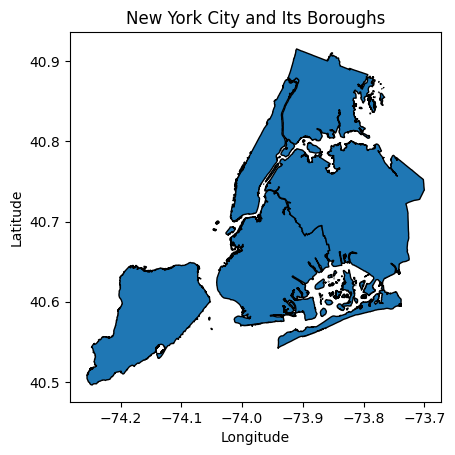

In [18]:
# Map of New York City

# Load the shapefile (adjust the path accordingly)
nyc = gpd.read_file("/content/Borough Boundaries.zip")
# Handle multi-part geometries
nyc = nyc.explode(index_parts=False)

# Plotting NYC and its boroughs
plt.figure(figsize=(10, 8))
nyc.plot(edgecolor='black')
plt.title('New York City and Its Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'New York City and Its Boroughs')

Text(0.5, 23.52222222222222, 'Longitude')

Text(96.39215564756849, 0.5, 'Latitude')

<Figure size 1200x1000 with 0 Axes>

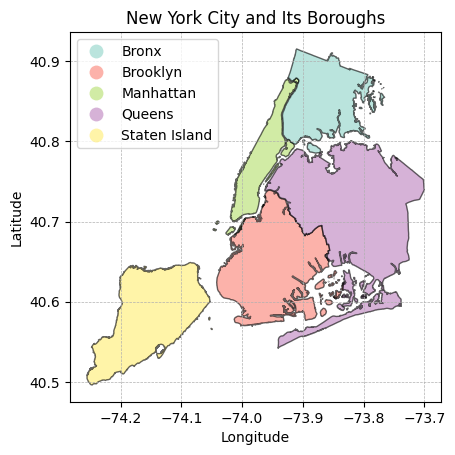

In [19]:
#NYC and its Boroughs with names

# Adding Categorical column
nyc['borough'] = nyc['boro_name']

# Plotting NYC and its boroughs with aesthetic improvements
plt.figure(figsize=(12, 10))
ax = nyc.plot(
    column='borough',  # Column to use for coloring
    edgecolor='black',
    alpha=0.6,
    cmap='Set3',
    legend=True,
    legend_kwds={'loc': 'upper left', 'fontsize': 10}
)

# Additional styling
ax.set_title('New York City and Its Boroughs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.show()
